In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt


In [3]:
database = pd.read_csv('survey.csv')
database.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# group Gender
genders_male = ["M", "Male", "male", "m", 'Male-ish', 'maile',
                'Cis Male', 'Mal', 'Male (CIS)',
                'Make', 'male leaning androgynous', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']

genders_female = ['Female', 'female', 'Cis Female', 'F', 'f',
                  'Woman', 'Femake', 'woman', 'fluid', 'Female ',
                  'cis-female/femme', 'Female (cis)', 'femail']

genders_non_binary = ['Trans-female', 'queer/she/they',
                      'non-binary', 'Nah', 'Enby', 'Genderqueer',  'Androgyne',
                      'Agender', 'Guy (-ish) ^_^',  'Trans woman', 'Neuter',
                      'Female (trans)', 'queer', 'A little about you', 'ostensibly male, unsure what that really means','something kinda male?']

database.loc[(database['Gender'].isin(genders_male)), "Gender"] = "Male"
database.loc[(database['Gender'].isin(genders_female)), "Gender"] = "Female"
database.loc[(database['Gender'].isin(genders_non_binary)), "Gender"] = "NonBinary"


In [5]:
# clean age column
database1 = database[database['Age'] > 0]
database2 = database1[database1['Age'] < 100]

database2.loc[database2['Age'].between(0, 15, 'both'), 'AgeGroup'] = 'Kids'
database2.loc[database2['Age'].between(15, 20, 'right'), 'AgeGroup'] = 'Teen'
database2.loc[database2['Age'].between(20, 45, 'right'), 'AgeGroup'] = 'Adult'
database2.loc[database2['Age'].between(45, 100, 'right'), 'AgeGroup'] = 'Senior'



C:\Users\kanis\AppData\Local\Temp\ipykernel_4116\4125130073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database2.loc[database2['Age'].between(0, 15, 'both'), 'AgeGroup'] = 'Kids'


In [6]:
# group Country
Africa = ['South Africa', 'Nigeria']
American_Countries = ['United States', 'Canada',
                'Mexico', 'Costa Rica', 'Bahamas, The','Brazil', 'Colombia', 'Uruguay']
European_Countries = ['United Kingdom', 'Bulgaria', 'France', 'Portugal',
          'Netherlands', 'Switzerland', 'Poland', 'Germany', 'Russia',
          'Slovenia', 'Austria', 'Ireland', 'Italy', 'Sweden',
          'Latvia', 'Romania', 'Belgium', 'Spain', 'Finland',
          'Bosnia and Herzegovina', 'Hungary', 'Croatia',
          'Norway', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'Czech Republic']
Australia = ['Australia', 'New Zealand']
Asian_Countries = ['India', 'Israel', 'Singapore',
        'Japan', 'Thailand', 'China', 'Philippines']



database2.loc[(database2['Country'].isin(American_Countries)), "Country"] = "American Countries"
database2.loc[(database2['Country'].isin(Asian_Countries)), "Country"] = "Asian Countries"
database2.loc[(database2['Country'].isin(European_Countries)), "Country"] = "European Countries"
database2.loc[(database2['Country'].isin(Australia)), "Country"] = "Australia"
database2.loc[(database2['Country'].isin(Africa)), "Country"] = "Africa"

In [7]:
# Data sorting
database2.loc[(database2['benefits'].isin(['No', "Don't know"])), "benefits"] = "No"
database2.loc[(database2['benefits'].isin(['Yes'])), "benefits"] = "Yes"

database2.loc[(database2['mental_health_consequence'].isin(['No'])),
        "mental_health_consequence"] = "No"
database2.loc[(database2['mental_health_consequence'].isin(['Yes', 'Maybe'])),
        "mental_health_consequence"] = "Yes"

database2.loc[(database2['coworkers'].isin(['No'])),
        "coworkers"] = "No"
database2.loc[(database2['coworkers'].isin(['Yes', 'Some of them'])),
        "coworkers"] = "Yes"

database2.loc[(database2['leave'].isin(['Somewhat easy','Very easy',"Don't know"])),
        "leave"] = "YES"
database2.loc[(database2['leave'].isin(['Somewhat difficult', 'Very difficult'])),
        "leave"] = "NO"

database2.loc[(database2['mental_vs_physical'].isin(['No', "Don't know"])), "mental_vs_physical"] = "No"
database2.loc[(database2['mental_vs_physical'].isin(['Yes'])), "mental_vs_physical"] = "Yes"

database2.loc[(database2['care_options'].isin(['No', "Not sure"])), "care_options"] = "No"
database2.loc[(database2['care_options'].isin(['Yes'])), "care_options"] = "Yes"


<AxesSubplot:ylabel='Country'>

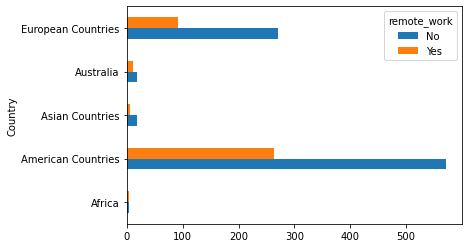

In [8]:
# print(database2['phys_health_consequence'].unique())

final_data = database2[['AgeGroup','Country','coworkers',
                   'leave', 'mental_health_consequence','care_options',
                  'remote_work','benefits','treatment','obs_consequence','mental_vs_physical',]]

database3=final_data.groupby(['Country','remote_work']).size()
database3=database3.unstack()
database3.plot(kind="barh")

# database4=final_data.groupby(['Region','obs_consequence']).size()
# database4=database4.unstack()
# database4.plot(kind='bar')

## Analysis on American company

<AxesSubplot:ylabel='Mental Health consequence'>

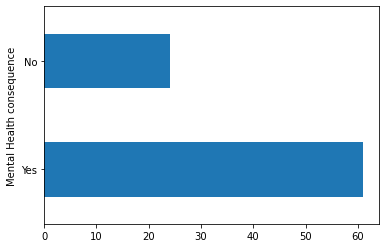

In [18]:
database4 = final_data.query('benefits == "Yes" & treatment == "Yes" & Country == "American Countries" & care_options == "No"')

database4['mental_health_consequence'].value_counts().plot(kind="barh",xlabel="Mental Health consequence", ylabel="count")



<AxesSubplot:ylabel='Mental Health consequence'>

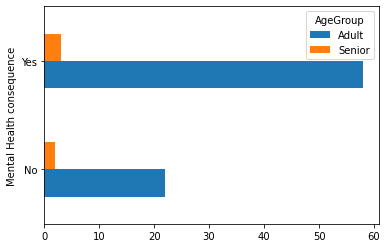

In [10]:
database5=database4.groupby(['mental_health_consequence','AgeGroup']).size()
database5=database5.unstack()
database5.plot(kind='barh', xlabel="Mental Health consequence", ylabel="count")

## Analysis on Europe

<AxesSubplot:ylabel='Mental Health consequence'>

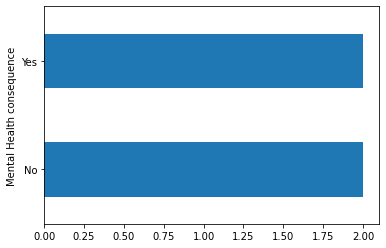

In [11]:
surveydata = final_data.query('benefits == "Yes" & treatment == "Yes" & Country == "European Countries" & care_options == "No"')
surveydata['mental_health_consequence'].value_counts().plot(kind="barh",xlabel="Mental Health consequence", ylabel="count")

<AxesSubplot:ylabel='mental_health_consequence'>

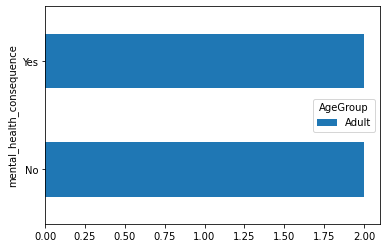

In [12]:
surveydata2=surveydata.groupby(['mental_health_consequence','AgeGroup']).size()
surveydata2=surveydata2.unstack()
surveydata2.plot(kind='barh')